In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt

# get the data and make it nice

In [2]:
df = pd.read_excel('C:/Users/geeze/Documents/finances/ins_n_outs.xlsx')

In [3]:
df.head()

,month,year,rent,utilsCurt,utilsFair,income,cc spend,venmo,reimburse,misc corrections,note
0,8,2013,0.0,49.5,NaN,2000.0,NaN,NaN,NaN,NaN,NaN
1,9,2013,0.0,53.0,NaN,2000.0,NaN,NaN,NaN,NaN,NaN
2,10,2013,0.0,23.5,NaN,2000.0,NaN,NaN,NaN,NaN,NaN
3,11,2013,0.0,24.5,NaN,2000.0,NaN,NaN,NaN,NaN,NaN
4,12,2013,0.0,25.5,NaN,2000.0,4.79,NaN,NaN,NaN,NaN


In [4]:
df = df.fillna(value=0)

# set up the things that are ins and things that are outs

In [5]:
def plus_minus (df):
    
    #standard stuff like income, reimbursements and the misc corrections that are right now (02/05/2020) just internet
    ins = df['income'] + df['reimburse'] + df['misc corrections']
    
    #since venmo can go pos or neg, just use it to offset negs if positive or add to negs if neg
    outs = df['venmo'] - df['utilsCurt'] - df['utilsFair'] - df['cc spend'] - df['rent']
    
    #define required spending (like living expenses)
    req_out = df['rent'] + df['utilsCurt'] + df['utilsFair']
    
    #define discretionary spending. This obviously doesn't account for like checks written and stuff
    #these untracked things are assumed to be small
    disc_out = -(df['venmo'] - df['cc spend']) #this assumes that venmo will always be less than credit card spending
    
    net = ins + outs
    
    return net, req_out, disc_out, ins

In [6]:
df['unspent'], df['req spend'], df['disc spend'], df['total ins']= plus_minus(df)

In [7]:
df

,month,year,rent,utilsCurt,utilsFair,income,cc spend,venmo,reimburse,misc corrections,note,unspent,req spend,disc spend,total ins
0,8,2013,0.0,49.5,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1950.5000,49.5000,-0.00,2000.00
1,9,2013,0.0,53.0,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1947.0000,53.0000,-0.00,2000.00
2,10,2013,0.0,23.5,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1976.5000,23.5000,-0.00,2000.00
3,11,2013,0.0,24.5,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1975.5000,24.5000,-0.00,2000.00
4,12,2013,0.0,25.5,0.0000,2000.00,4.79,0.00,0.00,0.00,0,1969.7100,25.5000,4.79,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,6,2020,1125.0,0.0,59.5775,2666.67,721.12,3.00,359.88,44.99,illustrator license is the reimbursement,1168.8425,1184.5775,718.12,3071.54
83,7,2020,1125.0,0.0,83.6925,2666.67,915.91,212.64,0.00,59.99,internet cost increases to 59.99 since first y...,814.6975,1208.6925,703.27,2726.66
84,8,2020,1125.0,0.0,110.1650,2666.67,763.17,425.27,0.00,59.99,0,1153.5950,1235.1650,337.90,2726.66
85,9,2020,1125.0,0.0,81.6075,2666.67,1036.49,608.00,0.00,59.99,0,1091.5625,1206.6075,428.49,2726.66


In [8]:
def make_dtime (df):

    date_info = df.loc[:, ['month', 'year']]
    
    date_info['day'] = 1
        
    date = pd.to_datetime(date_info)
    
    return date

In [9]:
df['date'] = make_dtime(df)

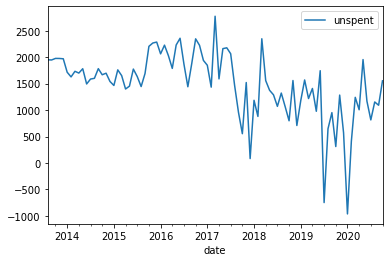

In [10]:
### absolute unspent money
df.plot(x='date', y='unspent')

In [11]:
### total saved cash over whole time

df['unspent'].sum()

129504.87333333003

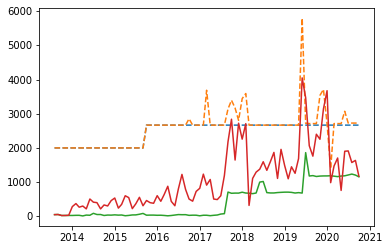

In [12]:
### ABSOLUTE SPENDING VS INFLOW

#put income on there
plt.plot(df['date'], df['income'], '--')

#put income plus other sources of money that month on there
plt.plot(df['date'], df['total ins'], '--')

#now add required spending
plt.plot(df['date'], df['req spend'])

#now add discretionary spending above required.
plt.plot(df['date'], df['req spend']+df['disc spend'])




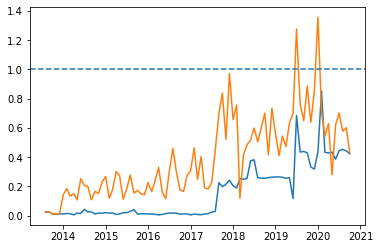

In [13]:
### SPENDING AS PERCENT OF INFLOW

#required spending as percentage of total inflow
plt.plot(df['date'], df['req spend'] / df['total ins'])

#now add discretionary spending above required as percentage of total inflow
plt.plot(df['date'], (df['req spend']+df['disc spend']) / df['total ins'])

plt.axhline(1, linestyle = '--')

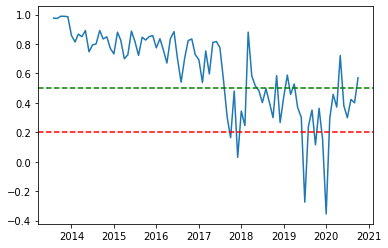

In [14]:
### PERCENT OF INFLOW SAVED

plt.plot(df['date'], df['unspent'] / df['total ins'])

plt.axhline(0.2, color='r',linestyle='--')
plt.axhline(0.5, color='g', linestyle='--')

In [15]:
### MEAN SAVINGS BEFORE AND AFTER A CERTAIN DATE, PERCENT OF INFLOW

#set date
d = datetime.datetime(2019, 10, 1)

i = df['date'] >= d

#amounts unspend AFTER date d
not_spent_after_d = df.loc[i, 'unspent']
             
#total amounts in AFTER date d
all_in_after_d = df.loc[i, 'total ins']
             
print('The mean percent of inflow saved after ', d, ' is ', 100*(not_spent_after_d / all_in_after_d).mean())

The mean percent of inflow saved after  2019-10-01 00:00:00  is  31.452485468140452


In [16]:
### absolute savings before or after a certain date

#set date
d = datetime.datetime(2020, 1, 1)

i = df['date'] >= d

#if 1, you want the total AFTER date d, 0 means you want total from beginning UP TO date d (before)
after = 0

if after == 1:
    pass
    word = ' from {} until present:'.format(d)
else:
    i = ~i
    word = ' from start until {}:'.format(d)


#sum up the unspent monies before or after date d. Use the ~ operator to determine before or after
# ~ makes it the sum from the beginning up until date d, regular means after date d
print('You have saved this much', word, df.loc[i, 'unspent'].sum())

You have saved this much  from start until 2020-01-01 00:00:00: 120071.51083333003
